# Disaster Tweets

### Imports

In [1]:
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Removindo numbers e symbols. Applying tokenization, stemming, removing stopping words and applying join.

In [4]:
dataset['text'] = dataset['text'].apply(lambda x: re.sub('[-|0-9]',' ', x))

In [5]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,", people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
dataset['text'] = dataset['text'].apply(lambda x: re.sub(r'[-./?!,"#@:;()\']',' ', x))

In [7]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are ...,1
3,6,NaN,NaN,people receive wildfires evacuation or...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as ...,1


In [8]:
dataset['text'] = dataset['text'].apply(lambda x: nltk.word_tokenize(x))

In [9]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[Our, Deeds, are, the, Reason, of, this, earth...",1
1,4,NaN,NaN,"[Forest, fire, near, La, Ronge, Sask, Canada]",1
2,5,NaN,NaN,"[All, residents, asked, to, shelter, in, place...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[Just, got, sent, this, photo, from, Ruby, Ala...",1


In [10]:
def Stemming(sentence):
    stemmer = PorterStemmer()
    phrase = []
    for word in sentence:
        phrase.append(stemmer.stem(word.lower()))
    return phrase

In [11]:
dataset['text'] = dataset['text'].apply(Stemming)

In [12]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[our, deed, are, the, reason, of, thi, earthqu...",1
1,4,NaN,NaN,"[forest, fire, near, la, rong, sask, canada]",1
2,5,NaN,NaN,"[all, resid, ask, to, shelter, in, place, are,...",1
3,6,NaN,NaN,"[peopl, receiv, wildfir, evacu, order, in, cal...",1
4,7,NaN,NaN,"[just, got, sent, thi, photo, from, rubi, alas...",1


In [13]:
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
def RemoveStopWords(sentence):
    stopwords = nltk.corpus.stopwords.words('english')
    phrase = []
    for word in sentence:
        if word not in stopwords:
            phrase.append(word)
    return phrase

In [16]:
dataset['text'] = dataset['text'].apply(RemoveStopWords)

In [17]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deed, reason, thi, earthquak, may, allah, for...",1
1,4,NaN,NaN,"[forest, fire, near, la, rong, sask, canada]",1
2,5,NaN,NaN,"[resid, ask, shelter, place, notifi, offic, ev...",1
3,6,NaN,NaN,"[peopl, receiv, wildfir, evacu, order, califor...",1
4,7,NaN,NaN,"[got, sent, thi, photo, rubi, alaska, smoke, w...",1


In [18]:
dataset['text'] = dataset['text'].apply(lambda x: " ".join(x))

In [19]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason thi earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent thi photo rubi alaska smoke wildfir p...,1


### Training model

In [20]:
X = dataset['text']

In [21]:
y = dataset['target']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

In [23]:
vectorizer = CountVectorizer()
svm = LinearSVC()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
_ = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1275
           1       0.76      0.70      0.73      1009

    accuracy                           0.77      2284
   macro avg       0.77      0.76      0.77      2284
weighted avg       0.77      0.77      0.77      2284



In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.771891418563923


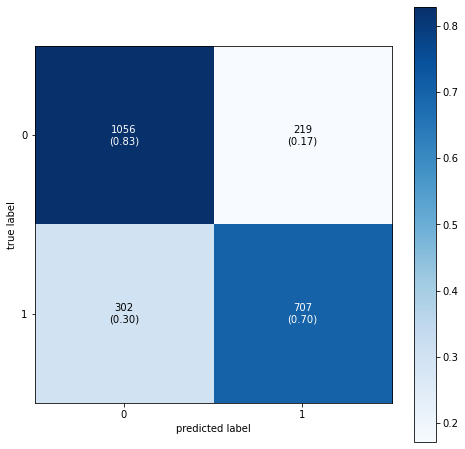

In [25]:
cnf_mat=confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cnf_mat,figsize=(8, 8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### Applying model on test data

In [26]:
test = pd.read_csv("test.csv")

In [27]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [28]:
test['text'] = test['text'].apply(lambda x: re.sub('[-|0-9]',' ', x))
test['text'] = test['text'].apply(lambda x: re.sub(r'[-./?!,"#@:;()\']',' ', x))
test['text'] = test['text'].apply(lambda x: nltk.word_tokenize(x))
test['text'] = test['text'].apply(RemoveStopWords)
test['text'] = test['text'].apply(Stemming)
test['text'] = test['text'].apply(lambda x: " ".join(x))
test

,id,keyword,location,text
0,0,NaN,NaN,just happen terribl car crash
1,2,NaN,NaN,heard earthquak differ citi stay safe everyon
2,3,NaN,NaN,forest fire spot pond gees flee across street ...
3,9,NaN,NaN,apocalyps light spokan wildfir
4,11,NaN,NaN,typhoon soudelor kill china taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquak safeti lo angel ûò safeti fasten xrwn
3259,10865,NaN,NaN,storm ri wors last hurrican my citi & amp othe...
3260,10868,NaN,NaN,green line derail chicago http co utbxlcbiuy
3261,10874,NaN,NaN,meg issu hazard weather outlook hwo http co x ...


In [29]:
X_testing = test['text']

In [30]:
X_testin = vectorizer.transform(X_testing)

In [31]:
result = svm.predict(X_testin)
result

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

### Creating submission file

In [32]:
# criando o arquivo de submissão
solution = pd.DataFrame({"id":test.id, "text": result})

In [33]:
solution

,id,text
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [34]:
solution = solution.rename(columns={'text': 'target'})

In [35]:
solution

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [36]:
solution.to_csv("DisasterTweets.csv", index = False)